<a href="https://colab.research.google.com/github/OpenDiophantus/hello-world/blob/master/FINAL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#1.
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
data = pd.read_csv('/content/facialex.csv')
data.head()

,emotion,pixels,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column2296,Column2297,Column2298,Column2299,Column2300,Column2301,Column2302,Column2303,Column2304,Column2305
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,2,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,4,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,6,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


TypeError: Invalid shape (2304,) for image data

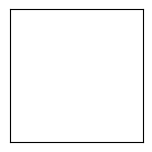

In [42]:
from sklearn.model_selection import train_test_split
#2.
np.random.seed(2023)

#3.
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

TypeError: Invalid shape (2304,) for image data

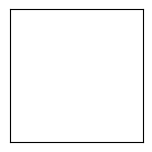

In [43]:
#4.

plt.figure(figsize=[10, 10])
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X.iloc[i], cmap='gray')
    plt.xlabel(class_names[y.iloc[i]])
plt.show()

In [44]:

#5.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2022, stratify=y)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

#6.
X_train = X_train / 255.0
X_test = X_test / 255.0

#7.
X_train = np.reshape(X_train.to_numpy(), (-1, 48, 48))
X_test = np.reshape(X_test.to_numpy(), (-1, 48, 48))

X_train shape: (25120, 2304)
y_train shape: (25120,)
X_test shape: (10767, 2304)
y_test shape: (10767,)


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#8.
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Bonus: padding aids helps in maintaing the spatial dimensions of the input volume (done by adding some zeros around the border).
# Bonus: the dropout layer randomly does fraction of input units to zero and essentially prevents overfitting.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 10, 10, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 6400)             

In [46]:
#9
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#10 BONUS:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# the main difference is the loss function, where sparse is used when labels are whole nubers vs. not sparse is used when labels are in a single encoded format.
# this clearly justifies different uses on a case-by-case basis (SCCE simplifies representing labels whereas CCE requies the single encoding).

In [32]:
#11
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))


Epoch 1/2
785/785 [==============================] - 91s 114ms/step - loss: 1.7449 - accuracy: 0.2977 - val_loss: 1.5530 - val_accuracy: 0.3847
Epoch 2/2
785/785 [==============================] - 89s 114ms/step - loss: 1.5429 - accuracy: 0.4022 - val_loss: 1.4198 - val_accuracy: 0.4562


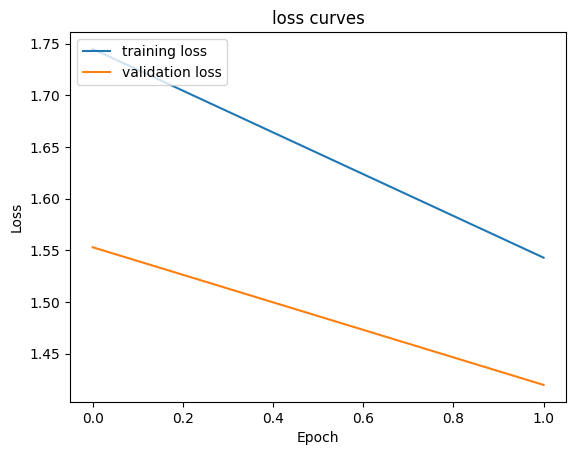

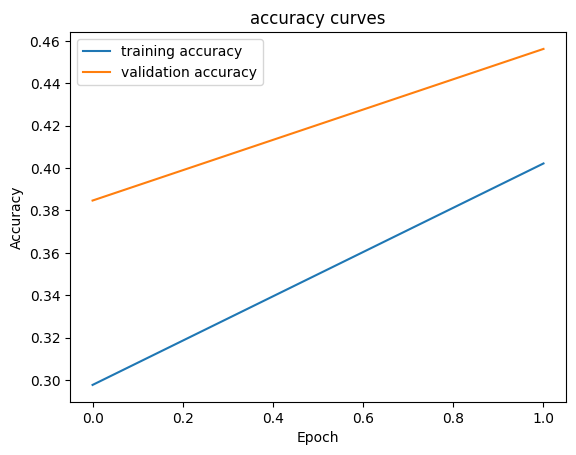

In [47]:
#12.
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training loss', 'validation loss'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='upper left')
plt.show()

In [41]:
#13.
predictions = model.predict(X_test)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)  # Assuming X_test contains the images
    predicted_label = np.argmax(predictions[i])
    actual_label = y_test[i]
    plt.xlabel(f"Predicted: {class_names[predicted_label]}, Actual: {class_names[actual_label]}")
plt.show()

142/337 [===========>..................] - ETA: 8s

KeyboardInterrupt: 

In [ ]:
#14.
failed_indices = []
for i in range(len(y_test)):
    if y_test[i][0] != pred_classes[i]:
        failed_indices.append(i)

plt.figure(figsize=(15, 15))
for i in range(30):
    random_select = np.random.randint(0, len(failed_indices))
    failed_index = failed_indices[random_select]
    plt.subplot(5, 6, i+1)
    plt.imshow(X_test[failed_index], cmap=plt.cm.binary)
    plt.title(f"Actual: {class_names[y_test[failed_index][0]]}, Predicted: {class_names[pred_classes[failed_index]]}")
    plt.axis('off')
plt.show()